In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install ucimlrepo 
from ucimlrepo import fetch_ucirepo
# fetch dataset
adult = fetch_ucirepo (id=2)
# data (as pandas ditaframes)
X = adult.data.features
y = adult.data.targets

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [4]:
X.shape

(48842, 14)

In [5]:
y.shape

(48842, 1)

In [75]:
X.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [76]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


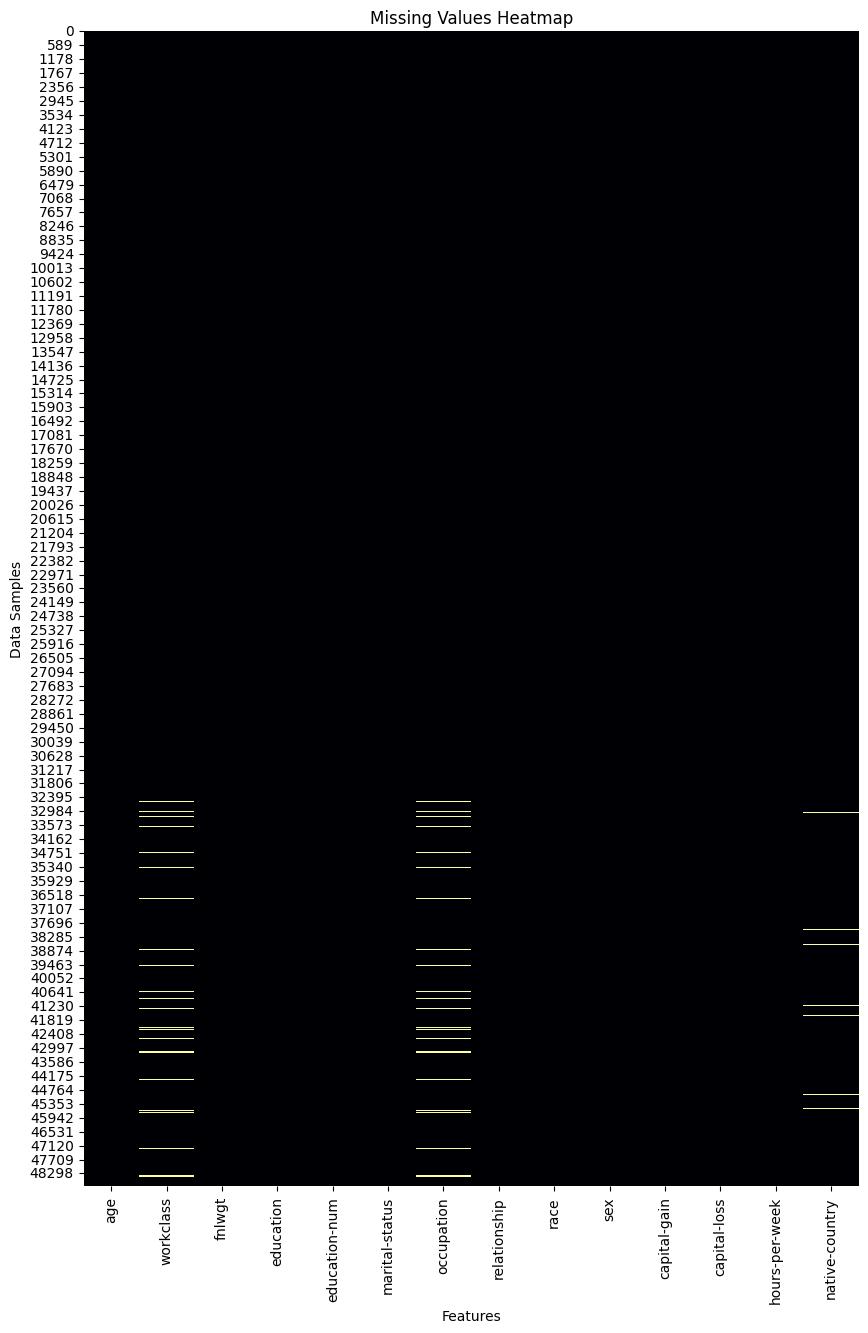

In [33]:
plt.figure(figsize=(10, 15))
sns.heatmap(X.isnull(), cbar=False, cmap='inferno')
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Samples')
plt.show()

In [29]:
null_counts = X.isnull().sum()
# Calculate percentages
null_percentages = (X.isnull().sum() / len(X)) * 100

# Concatenate null counts and percentages into a DataFrame
null_info = pd.concat([null_counts, null_percentages], axis=1)
null_info.columns = ['Null Count', 'Null Percentage']
null_info

,Null Count,Null Percentage
age,0,0.000000
workclass,963,1.971664
fnlwgt,0,0.000000
education,0,0.000000
education-num,0,0.000000
marital-status,0,0.000000
occupation,966,1.977806
relationship,0,0.000000
race,0,0.000000
sex,0,0.000000


In [67]:
# categorical_columns = X.select_dtypes().columns.tolist()
# categorical_columns
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [70]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [74]:
import pandas as pd

# Assuming 'X' is your pandas DataFrame
data = []

for column in ['workclass',  'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']:
    unique_values = X[column].value_counts()
    for value, count in unique_values.items():
        data.append({'Column Name': column, 
                     'Unique Value': value, 
                     'Value Count': count})

unique_value_table = pd.DataFrame(data)
unique_value_table.set_index(['Column Name', 'Unique Value','Value Count'], inplace=True)

unique_value_table.head(55)


Empty DataFrame
Columns: []
Index: [(workclass, Private, 33906), (workclass, Self-emp-not-inc, 3862), (workclass, Local-gov, 3136), (workclass, State-gov, 1981), (workclass, ?, 1836), (workclass, Self-emp-inc, 1695), (workclass, Federal-gov, 1432), (workclass, Without-pay, 21), (workclass, Never-worked, 10), (education, HS-grad, 15784), (education, Some-college, 10878), (education, Bachelors, 8025), (education, Masters, 2657), (education, Assoc-voc, 2061), (education, 11th, 1812), (education, Assoc-acdm, 1601), (education, 10th, 1389), (education, 7th-8th, 955), (education, Prof-school, 834), (education, 9th, 756), (education, 12th, 657), (education, Doctorate, 594), (education, 5th-6th, 509), (education, 1st-4th, 247), (education, Preschool, 83), (marital-status, Married-civ-spouse, 22379), (marital-status, Never-married, 16117), (marital-status, Divorced, 6633), (marital-status, Separated, 1530), (marital-status, Widowed, 1518), (marital-status, Married-spouse-absent, 628), (marital-status, Married-AF-spouse, 37), (occupation, Prof-specialty, 6172), (occupation, Craft-repair, 6112), (occupation, Exec-managerial, 6086), (occupation, Adm-clerical, 5611), (occupation, Sales, 5504), (occupation, Other-service, 4923), (occupation, Machine-op-inspct, 3022), (occupation, Transport-moving, 2355), (occupation, Handlers-cleaners, 2072), (occupation, ?, 1843), (occupation, Farming-fishing, 1490), (occupation, Tech-support, 1446), (occupation, Protective-serv, 983), (occupation, Priv-house-serv, 242), (occupation, Armed-Forces, 15), (relationship, Husband, 19716), (relationship, Not-in-family, 12583), (relationship, Own-child, 7581), (relationship, Unmarried, 5125), (relationship, Wife, 2331), (relationship, Other-relative, 1506), (race, White, 41762), (race, Black, 4685)]